## Reduccion de todos los datsets

In [ ]:
!pip install opencv-python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

carga de el testing_data \ C-NMC_test_final_phase_data

In [ ]:

#Path
testing_data_path = "data/testing_data/C-NMC_test_final_phase_data/"

#Lista imagenes
testing_data = []

for i in range(1, 2587):
    nombre_archivo = os.path.join(testing_data_path, f"{i}.bmp")
    if not os.path.exists(nombre_archivo):
        print(f"Advertencia: no existe {nombre_archivo}")
        continue
    img = cv2.imread(nombre_archivo)
    if img is not None:
        testing_data.append(img)
    else:
        print(f"Advertencia: no se pudo cargar la imagen {nombre_archivo}")


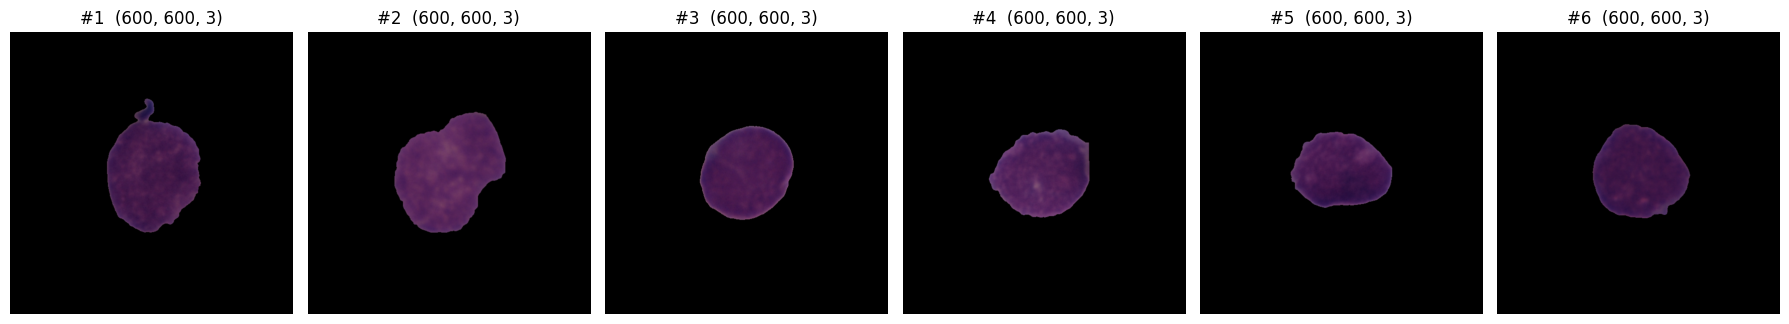

In [ ]:

# Mostrar las primeras N imágenes cargadas en testing_data
N = 6
if isinstance(testing_data, list) and len(testing_data) > 0:
    n = min(N, len(testing_data))
    plt.figure(figsize=(3*n, 4))
    for i in range(n):
        img = testing_data[i]
        if img is None:
            continue
        # Si es BGR (cv2) convertir a RGB para matplotlib
        if len(img.shape) == 3 and img.shape[2] == 3:
            disp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            cmap = None
        else:
            disp = img
            cmap = 'gray'
        ax = plt.subplot(1, n, i+1)
        plt.imshow(disp, cmap=cmap)
        plt.title(f"#{i+1}  {disp.shape}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("testing_data no es una lista o está vacía. Asegúrate de haber ejecutado la celda que carga las imágenes.")


Carga de imagenes de training_data / fold_0 /all

In [ ]:

# path
training_data_fold_0_all_path = "data/training_data/fold_0/all/"

#Lista imagenes
training_data_fold_0_all = []

#Definicion de parametros
total_loaded = 0

max_x = 52
max_y = 37
max_z = 10

#ciclo para carga de imagenes

for x in range(1, max_x + 1):
    found_any_for_x = False
    for y in range(1, max_y + 1):
        found_any_for_y = False
        for z in range(1, max_z + 1):
            filename = f"UID_{x}_{y}_{z}_all.bmp"
            filepath = os.path.join(training_data_fold_0_all_path, filename)
            if os.path.exists(filepath):
                img = cv2.imread(filepath)
                if img is not None:
                    training_data_fold_0_all.append(img)
                    total_loaded += 1
                    found_any_for_y = True
                    found_any_for_x = True
                    print(f"Cargado: {filename} (Total cargados: {total_loaded})")
                else:
                    print(f"Advertencia: no se pudo cargar {filename}")
            # No archivo = continuar para siguiente z
        # Si no se encontró ninguna imagen para este y (en cualquiera de los z), continuar al siguiente y
        if not found_any_for_y:
            # Se asume no hay más para este y, se puede continuar con siguiente y
            continue
    # Si no se encontró ninguna imagen para este x (en cualquiera de los y,z) romper loop y pasar al siguiente x
    if not found_any_for_x:
        print(f"No se encontraron imágenes para x={x}, saltando al siguiente valor de x.")
        continue

print(f"Total imágenes cargadas: {total_loaded}")


Cargado: UID_1_1_1_all.bmp (Total cargados: 1)
Cargado: UID_1_2_1_all.bmp (Total cargados: 2)
Cargado: UID_1_2_2_all.bmp (Total cargados: 3)
Cargado: UID_1_3_1_all.bmp (Total cargados: 4)
Cargado: UID_1_4_1_all.bmp (Total cargados: 5)
Cargado: UID_1_4_2_all.bmp (Total cargados: 6)
Cargado: UID_1_5_1_all.bmp (Total cargados: 7)
Cargado: UID_1_6_1_all.bmp (Total cargados: 8)
Cargado: UID_1_7_1_all.bmp (Total cargados: 9)
Cargado: UID_1_7_2_all.bmp (Total cargados: 10)
Cargado: UID_1_8_1_all.bmp (Total cargados: 11)
Cargado: UID_1_8_2_all.bmp (Total cargados: 12)
Cargado: UID_1_9_1_all.bmp (Total cargados: 13)
Cargado: UID_1_9_2_all.bmp (Total cargados: 14)
Cargado: UID_1_10_1_all.bmp (Total cargados: 15)
Cargado: UID_1_10_2_all.bmp (Total cargados: 16)
Cargado: UID_1_10_3_all.bmp (Total cargados: 17)
Cargado: UID_1_10_4_all.bmp (Total cargados: 18)
Cargado: UID_1_11_1_all.bmp (Total cargados: 19)
No se encontraron imágenes para x=2, saltando al siguiente valor de x.
Cargado: UID_3_1_1_al

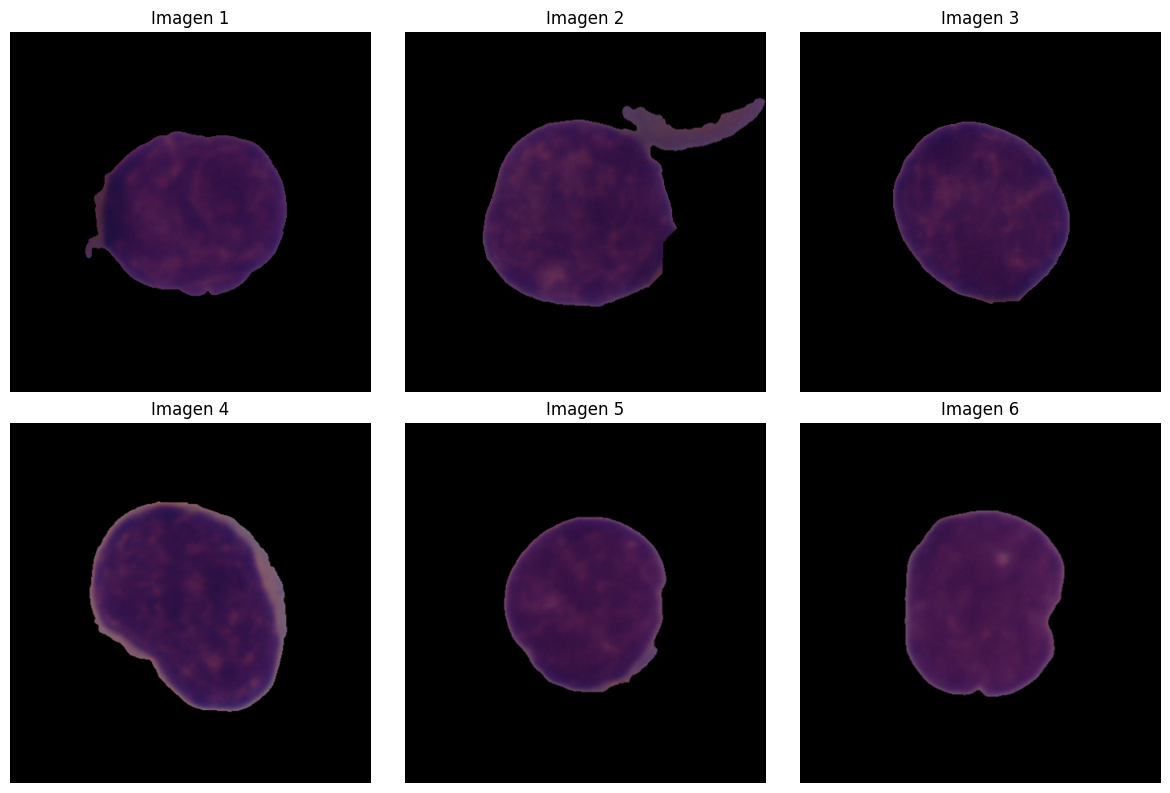

In [ ]:
#impresion de primeras 6 imagenes para verq ue se carguen de buena manera

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(min(6, len(training_data_fold_0_all))):
    ax = axes[i // 3, i % 3]
    # Convertir BGR a RGB para mostrar correctamente con matplotlib
    img_rgb = cv2.cvtColor(training_data_fold_0_all[i], cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(f"Imagen {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


Carga de imagenes de training_data / fold_0 /hem

In [ ]:

#path
training_data_fold_0_hem_path = "data/training_data/fold_0/hem/"

#Lista imagenes
training_data_fold_0_hem = []

#Definicion de parametros
total_loaded = 0

start_x = 6
end_x = 24
max_y = 36
max_z = 10

for x in range(start_x, end_x + 1):
    found_any_for_x = False
    for y in range(1, max_y + 1):
        found_any_for_y = False
        for z in range(1, max_z + 1):
            filename = f"UID_H{x}_{y}_{z}_hem.bmp"
            filepath = os.path.join(training_data_fold_0_hem_path, filename)
            if os.path.exists(filepath):
                img = cv2.imread(filepath)
                if img is not None:
                    training_data_fold_0_hem .append(img)
                    total_loaded += 1
                    found_any_for_y = True
                    found_any_for_x = True
                    print(f"Cargado: {filename} (Total cargados: {total_loaded})")
                else:
                    print(f"Advertencia: no se pudo cargar {filename}")
            # Si no existe el archivo, continúa para probar las demás combinaciones
        # Si no se encontró ninguna imagen para este y, saltamos al siguiente y
        if not found_any_for_y:
            continue
    # Si no se encontró ninguna imagen en todo y,z para este x, saltar a siguiente x
    if not found_any_for_x:
        print(f"No hay imágenes para x=H{x}, se pasa al siguiente.")
        continue

print(f"Carga finalizada. Total imágenes cargadas: {total_loaded}")


Cargado: UID_H6_1_1_hem.bmp (Total cargados: 1)
Cargado: UID_H6_1_2_hem.bmp (Total cargados: 2)
Cargado: UID_H6_2_1_hem.bmp (Total cargados: 3)
Cargado: UID_H6_3_1_hem.bmp (Total cargados: 4)
Cargado: UID_H6_4_1_hem.bmp (Total cargados: 5)
Cargado: UID_H6_5_1_hem.bmp (Total cargados: 6)
Cargado: UID_H6_6_1_hem.bmp (Total cargados: 7)
Cargado: UID_H6_7_1_hem.bmp (Total cargados: 8)
Cargado: UID_H6_8_1_hem.bmp (Total cargados: 9)
Cargado: UID_H6_10_1_hem.bmp (Total cargados: 10)
Cargado: UID_H6_10_2_hem.bmp (Total cargados: 11)
Cargado: UID_H6_11_1_hem.bmp (Total cargados: 12)
Cargado: UID_H6_12_1_hem.bmp (Total cargados: 13)
Cargado: UID_H6_14_1_hem.bmp (Total cargados: 14)
Cargado: UID_H6_15_1_hem.bmp (Total cargados: 15)
Cargado: UID_H6_15_2_hem.bmp (Total cargados: 16)
Cargado: UID_H6_15_3_hem.bmp (Total cargados: 17)
Cargado: UID_H6_16_1_hem.bmp (Total cargados: 18)
Cargado: UID_H7_1_1_hem.bmp (Total cargados: 19)
Cargado: UID_H7_1_2_hem.bmp (Total cargados: 20)
Cargado: UID_H7_2_1_

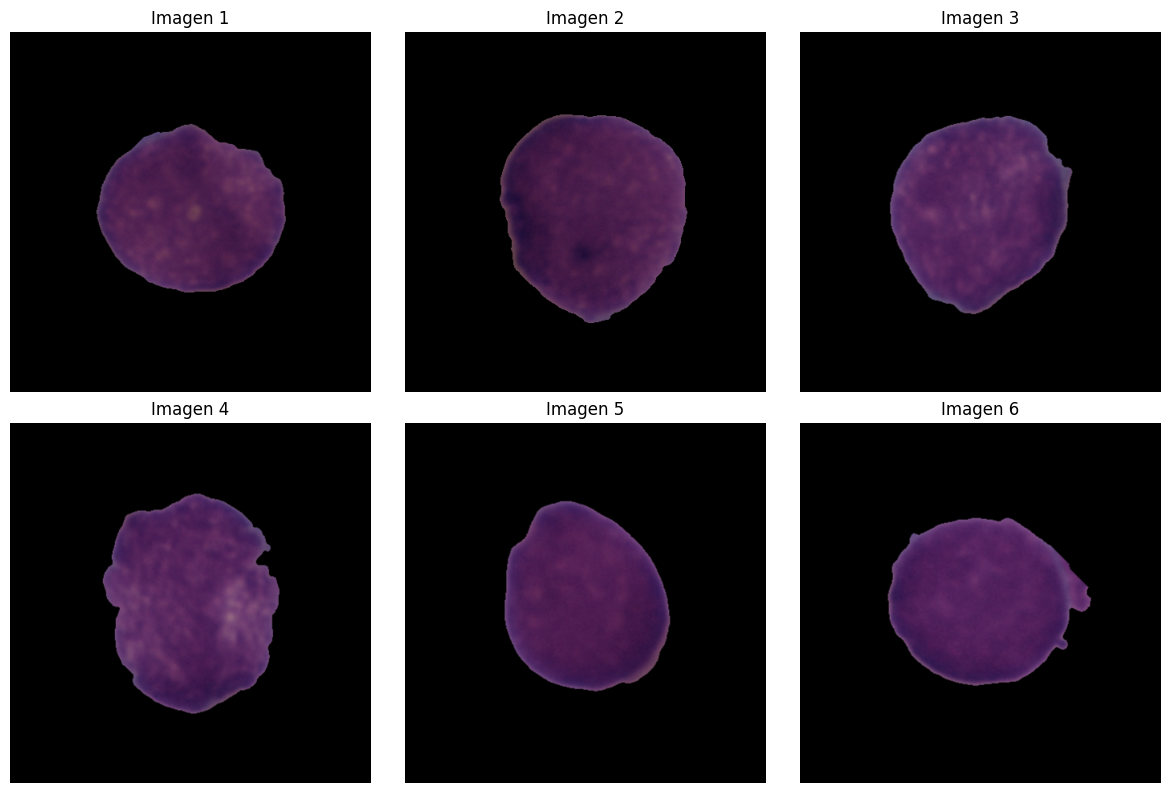

In [ ]:
#impresion de primeras 6 imagenes para ver que se carguen de buena manera

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(min(6, len(training_data_fold_0_hem ))):
    ax = axes[i // 3, i % 3]
    # Convertir de BGR (OpenCV) a RGB para mostrar correctamente
    img_rgb = cv2.cvtColor(training_data_fold_0_hem [i], cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(f"Imagen {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


Carga de imagenes de training_data / fold_1 /all

In [ ]:
# path
training_data_fold_1_all_path = "data/training_data/fold_1/all/"

#Lista imagenes
training_data_fold_1_all = []

#Definicion de parametros
total_loaded = 0

max_x = 52
max_y = 181
max_z = 15

for x in range(1, max_x + 1):
    found_any_for_x = False
    for y in range(1, max_y + 1):
        found_any_for_y = False
        for z in range(1, max_z + 1):
            filename = f"UID_{x}_{y}_{z}_all.bmp"
            filepath = os.path.join(training_data_fold_1_all_path, filename)
            if os.path.exists(filepath):
                img = cv2.imread(filepath)
                if img is not None:
                    training_data_fold_1_all.append(img)
                    total_loaded += 1
                    found_any_for_y = True
                    found_any_for_x = True
                    print(f"Cargado: {filename} (Total cargados: {total_loaded})")
                else:
                    print(f"Advertencia: no se pudo cargar {filename}")
            # No archivo = continuar para siguiente z
        # Si no se encontró ninguna imagen para este y (en cualquiera de los z), continuar al siguiente y
        if not found_any_for_y:
            # Se asume no hay más para este y, se puede continuar con siguiente y
            continue
    # Si no se encontró ninguna imagen para este x (en cualquiera de los y,z) romper loop y pasar al siguiente x
    if not found_any_for_x:
        print(f"No se encontraron imágenes para x={x}, saltando al siguiente valor de x.")
        continue

print(f"Total imágenes cargadas: {total_loaded}")

No se encontraron imágenes para x=1, saltando al siguiente valor de x.
Cargado: UID_2_1_1_all.bmp (Total cargados: 1)
Cargado: UID_2_1_2_all.bmp (Total cargados: 2)
Cargado: UID_2_2_1_all.bmp (Total cargados: 3)
Cargado: UID_2_3_1_all.bmp (Total cargados: 4)
Cargado: UID_2_3_2_all.bmp (Total cargados: 5)
Cargado: UID_2_3_3_all.bmp (Total cargados: 6)
Cargado: UID_2_3_4_all.bmp (Total cargados: 7)
Cargado: UID_2_5_1_all.bmp (Total cargados: 8)
Cargado: UID_2_5_2_all.bmp (Total cargados: 9)
Cargado: UID_2_5_3_all.bmp (Total cargados: 10)
Cargado: UID_2_5_4_all.bmp (Total cargados: 11)
Cargado: UID_2_5_5_all.bmp (Total cargados: 12)
Cargado: UID_2_6_1_all.bmp (Total cargados: 13)
Cargado: UID_2_6_2_all.bmp (Total cargados: 14)
Cargado: UID_2_6_3_all.bmp (Total cargados: 15)
Cargado: UID_2_6_4_all.bmp (Total cargados: 16)
Cargado: UID_2_8_1_all.bmp (Total cargados: 17)
Cargado: UID_2_8_2_all.bmp (Total cargados: 18)
Cargado: UID_2_8_3_all.bmp (Total cargados: 19)
Cargado: UID_2_9_1_all.bmp

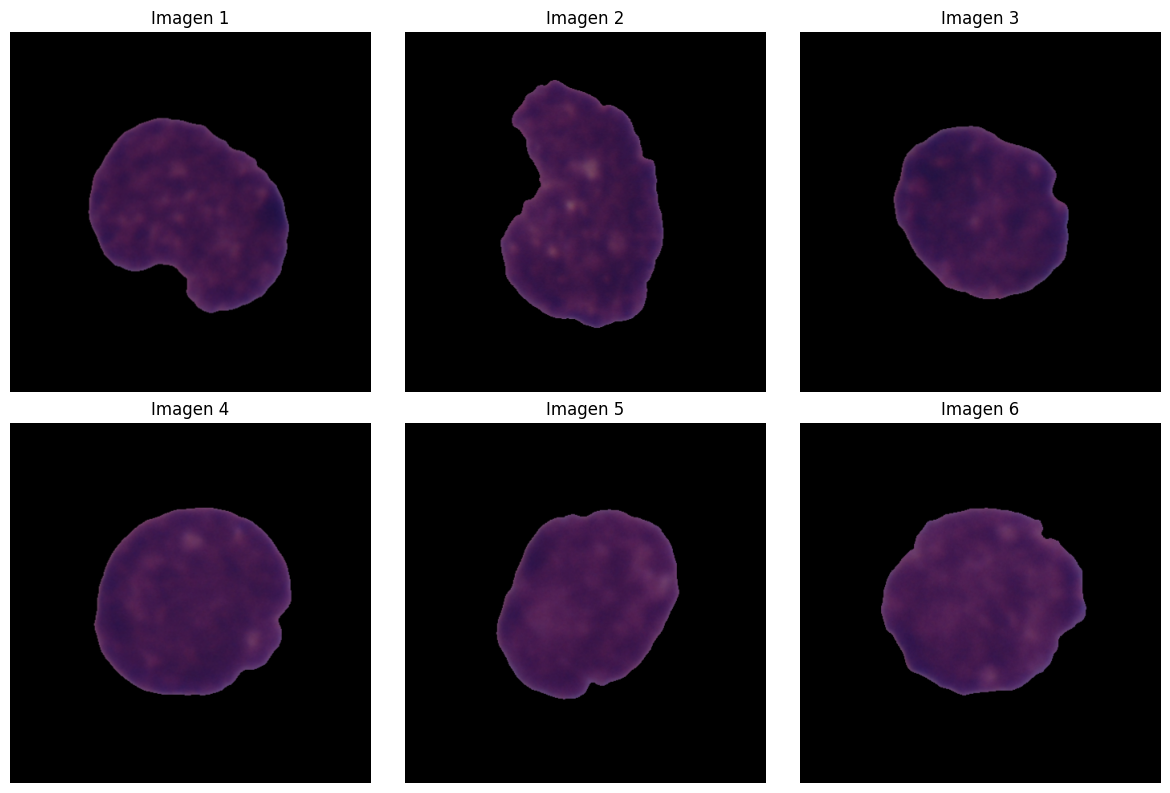

In [ ]:
#impresion de primeras 6 imagenes para ver que se carguen de buena manera

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(min(6, len(training_data_fold_1_all))):
    ax = axes[i // 3, i % 3]
    # Convertir BGR a RGB para mostrar correctamente con matplotlib
    img_rgb = cv2.cvtColor(training_data_fold_1_all[i], cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(f"Imagen {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


Carga de imagenes de training_data / fold_1 /hem

In [ ]:
# path
training_data_fold_1_hem_path = "data/training_data/fold_1/hem/"

#Lista imagenes
training_data_fold_1_hem = []


#Definicion de parametros
total_loaded = 0

start_x = 10
end_x = 23
max_y = 40
max_z = 15

for x in range(start_x, end_x + 1):
    found_any_for_x = False
    for y in range(1, max_y + 1):
        found_any_for_y = False
        for z in range(1, max_z + 1):
            filename = f"UID_H{x}_{y}_{z}_hem.bmp"
            filepath = os.path.join(training_data_fold_1_hem_path, filename)
            if os.path.exists(filepath):
                img = cv2.imread(filepath)
                if img is not None:
                    training_data_fold_1_hem .append(img)
                    total_loaded += 1
                    found_any_for_y = True
                    found_any_for_x = True
                    print(f"Cargado: {filename} (Total cargados: {total_loaded})")
                else:
                    print(f"Advertencia: no se pudo cargar {filename}")
            # Si no existe el archivo, continúa para probar las demás combinaciones
        # Si no se encontró ninguna imagen para este y, saltamos al siguiente y
        if not found_any_for_y:
            continue
    # Si no se encontró ninguna imagen en todo y,z para este x, saltar a siguiente x
    if not found_any_for_x:
        print(f"No hay imágenes para x=H{x}, se pasa al siguiente.")
        continue

print(f"Carga finalizada. Total imágenes cargadas: {total_loaded}")


Cargado: UID_H10_1_1_hem.bmp (Total cargados: 1)
Cargado: UID_H10_2_1_hem.bmp (Total cargados: 2)
Cargado: UID_H10_3_1_hem.bmp (Total cargados: 3)
Cargado: UID_H10_3_2_hem.bmp (Total cargados: 4)
Cargado: UID_H10_3_3_hem.bmp (Total cargados: 5)
Cargado: UID_H10_5_1_hem.bmp (Total cargados: 6)
Cargado: UID_H10_6_1_hem.bmp (Total cargados: 7)
Cargado: UID_H10_6_2_hem.bmp (Total cargados: 8)
Cargado: UID_H10_7_1_hem.bmp (Total cargados: 9)
Cargado: UID_H10_8_1_hem.bmp (Total cargados: 10)
Cargado: UID_H10_9_1_hem.bmp (Total cargados: 11)
Cargado: UID_H10_10_1_hem.bmp (Total cargados: 12)
Cargado: UID_H10_10_2_hem.bmp (Total cargados: 13)
Cargado: UID_H10_10_3_hem.bmp (Total cargados: 14)
Cargado: UID_H10_11_1_hem.bmp (Total cargados: 15)
Cargado: UID_H10_11_2_hem.bmp (Total cargados: 16)
Cargado: UID_H10_12_1_hem.bmp (Total cargados: 17)
Cargado: UID_H10_12_2_hem.bmp (Total cargados: 18)
Cargado: UID_H10_12_3_hem.bmp (Total cargados: 19)
Cargado: UID_H10_13_1_hem.bmp (Total cargados: 20)


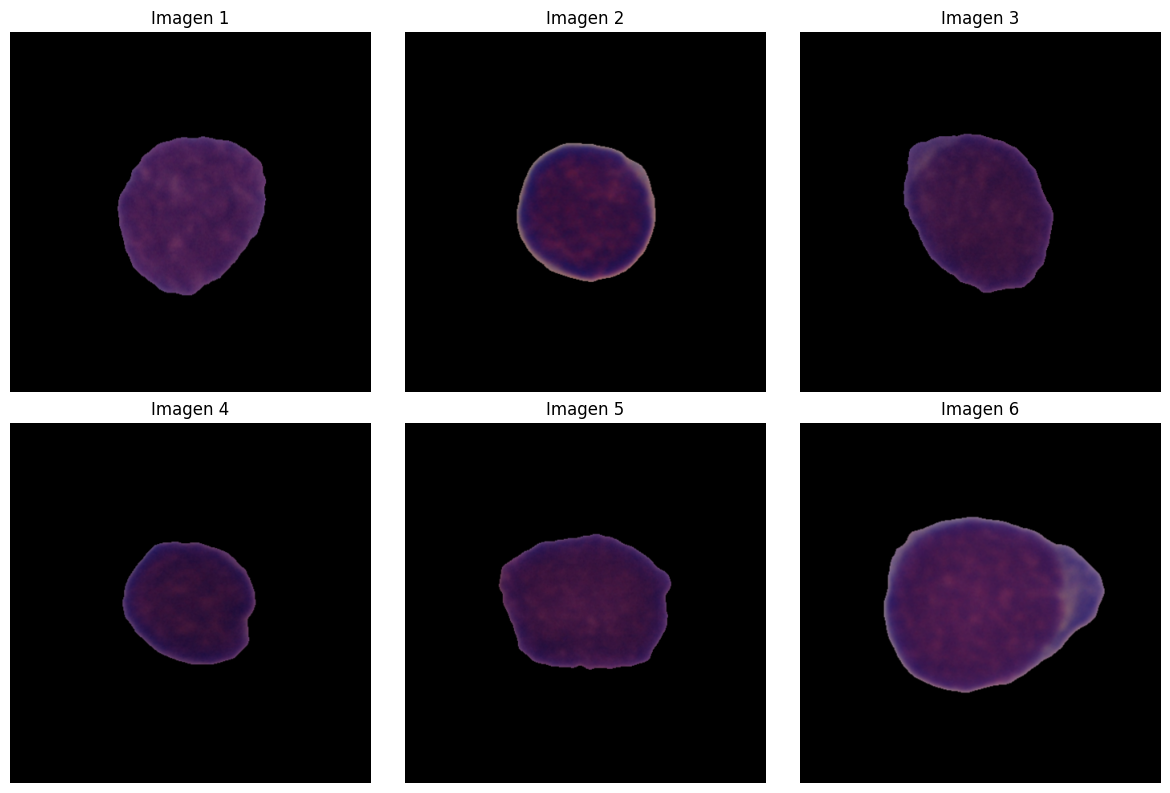

In [ ]:
#impresion de primeras 6 imagenes para ver que se carguen de buena manera

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(min(6, len(training_data_fold_1_hem ))):
    ax = axes[i // 3, i % 3]
    # Convertir de BGR (OpenCV) a RGB para mostrar correctamente
    img_rgb = cv2.cvtColor(training_data_fold_1_hem [i], cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(f"Imagen {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Carga de imagenes de training_data / fold_2 /all

In [ ]:
# path
training_data_fold_2_all_path = "data/training_data/fold_2/all/"

#Lista imagenes
training_data_fold_2_all = []

#Definicion de parametros
total_loaded = 0

max_x = 79
max_y = 40
max_z = 15

for x in range(1, max_x + 1):
    found_any_for_x = False
    for y in range(1, max_y + 1):
        found_any_for_y = False
        for z in range(1, max_z + 1):
            filename = f"UID_{x}_{y}_{z}_all.bmp"
            filepath = os.path.join(training_data_fold_2_all_path, filename)
            if os.path.exists(filepath):
                img = cv2.imread(filepath)
                if img is not None:
                    training_data_fold_2_all.append(img)
                    total_loaded += 1
                    found_any_for_y = True
                    found_any_for_x = True
                    print(f"Cargado: {filename} (Total cargados: {total_loaded})")
                else:
                    print(f"Advertencia: no se pudo cargar {filename}")
            # No archivo = continuar para siguiente z
        # Si no se encontró ninguna imagen para este y (en cualquiera de los z), continuar al siguiente y
        if not found_any_for_y:
            # Se asume no hay más para este y, se puede continuar con siguiente y
            continue
    # Si no se encontró ninguna imagen para este x (en cualquiera de los y,z) romper loop y pasar al siguiente x
    if not found_any_for_x:
        print(f"No se encontraron imágenes para x={x}, saltando al siguiente valor de x.")
        continue

print(f"Total imágenes cargadas: {total_loaded}")

No se encontraron imágenes para x=1, saltando al siguiente valor de x.
No se encontraron imágenes para x=2, saltando al siguiente valor de x.
No se encontraron imágenes para x=3, saltando al siguiente valor de x.
No se encontraron imágenes para x=4, saltando al siguiente valor de x.
No se encontraron imágenes para x=5, saltando al siguiente valor de x.
No se encontraron imágenes para x=6, saltando al siguiente valor de x.
No se encontraron imágenes para x=7, saltando al siguiente valor de x.
No se encontraron imágenes para x=8, saltando al siguiente valor de x.
No se encontraron imágenes para x=9, saltando al siguiente valor de x.
No se encontraron imágenes para x=10, saltando al siguiente valor de x.
No se encontraron imágenes para x=11, saltando al siguiente valor de x.
No se encontraron imágenes para x=12, saltando al siguiente valor de x.
Cargado: UID_13_1_1_all.bmp (Total cargados: 1)
Cargado: UID_13_3_1_all.bmp (Total cargados: 2)
Cargado: UID_13_4_1_all.bmp (Total cargados: 3)
C

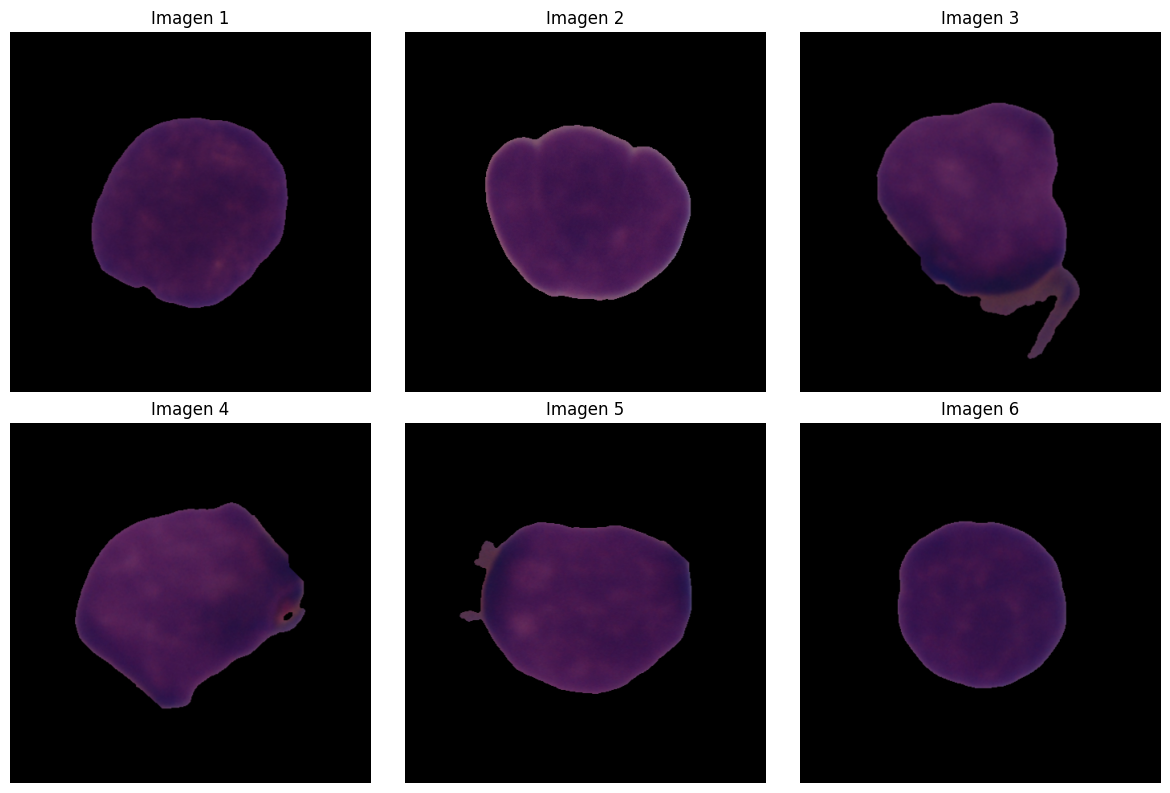

In [ ]:
#impresion de primeras 6 imagenes para ver que se carguen de buena manera
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(min(6, len(training_data_fold_2_all))):
    ax = axes[i // 3, i % 3]
    # Convertir BGR a RGB para mostrar correctamente con matplotlib
    img_rgb = cv2.cvtColor(training_data_fold_2_all[i], cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(f"Imagen {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Carga de imagenes de training_data / fold_2 /hem

In [ ]:
# path
training_data_fold_2_hem_path = "data/training_data/fold_2/hem/"

#Lista imagenes
training_data_fold_2_hem = []

#Definicion de parametros
total_loaded = 0

start_x = 1
end_x = 49
max_y = 30
max_z = 20


#ciclo para carga de imagenes
for x in range(start_x, end_x + 1):
    found_any_for_x = False
    for y in range(1, max_y + 1):
        found_any_for_y = False
        for z in range(1, max_z + 1):
            filename = f"UID_H{x}_{y}_{z}_hem.bmp"
            filepath = os.path.join(training_data_fold_2_hem_path, filename)
            if os.path.exists(filepath):
                img = cv2.imread(filepath)
                if img is not None:
                    training_data_fold_2_hem .append(img)
                    total_loaded += 1
                    found_any_for_y = True
                    found_any_for_x = True
                    print(f"Cargado: {filename} (Total cargados: {total_loaded})")
                else:
                    print(f"Advertencia: no se pudo cargar {filename}")
            # Si no existe el archivo, continúa para probar las demás combinaciones
        # Si no se encontró ninguna imagen para este y, saltamos al siguiente y
        if not found_any_for_y:
            continue
    # Si no se encontró ninguna imagen en todo y,z para este x, saltar a siguiente x
    if not found_any_for_x:
        print(f"No hay imágenes para x=H{x}, se pasa al siguiente.")
        continue

print(f"Carga finalizada. Total imágenes cargadas: {total_loaded}")

Cargado: UID_H1_1_1_hem.bmp (Total cargados: 1)
Cargado: UID_H1_2_1_hem.bmp (Total cargados: 2)
Cargado: UID_H1_3_1_hem.bmp (Total cargados: 3)
Cargado: UID_H1_5_1_hem.bmp (Total cargados: 4)
Cargado: UID_H1_6_1_hem.bmp (Total cargados: 5)
Cargado: UID_H1_7_1_hem.bmp (Total cargados: 6)
Cargado: UID_H1_8_1_hem.bmp (Total cargados: 7)
Cargado: UID_H1_9_1_hem.bmp (Total cargados: 8)
Cargado: UID_H1_10_1_hem.bmp (Total cargados: 9)
Cargado: UID_H1_11_1_hem.bmp (Total cargados: 10)
Cargado: UID_H1_15_1_hem.bmp (Total cargados: 11)
Cargado: UID_H1_16_1_hem.bmp (Total cargados: 12)
Cargado: UID_H1_16_2_hem.bmp (Total cargados: 13)
Cargado: UID_H1_19_1_hem.bmp (Total cargados: 14)
Cargado: UID_H1_20_1_hem.bmp (Total cargados: 15)
Cargado: UID_H1_21_1_hem.bmp (Total cargados: 16)
Cargado: UID_H1_22_1_hem.bmp (Total cargados: 17)
Cargado: UID_H1_23_1_hem.bmp (Total cargados: 18)
Cargado: UID_H1_25_1_hem.bmp (Total cargados: 19)
Cargado: UID_H1_27_1_hem.bmp (Total cargados: 20)
Cargado: UID_H1_2

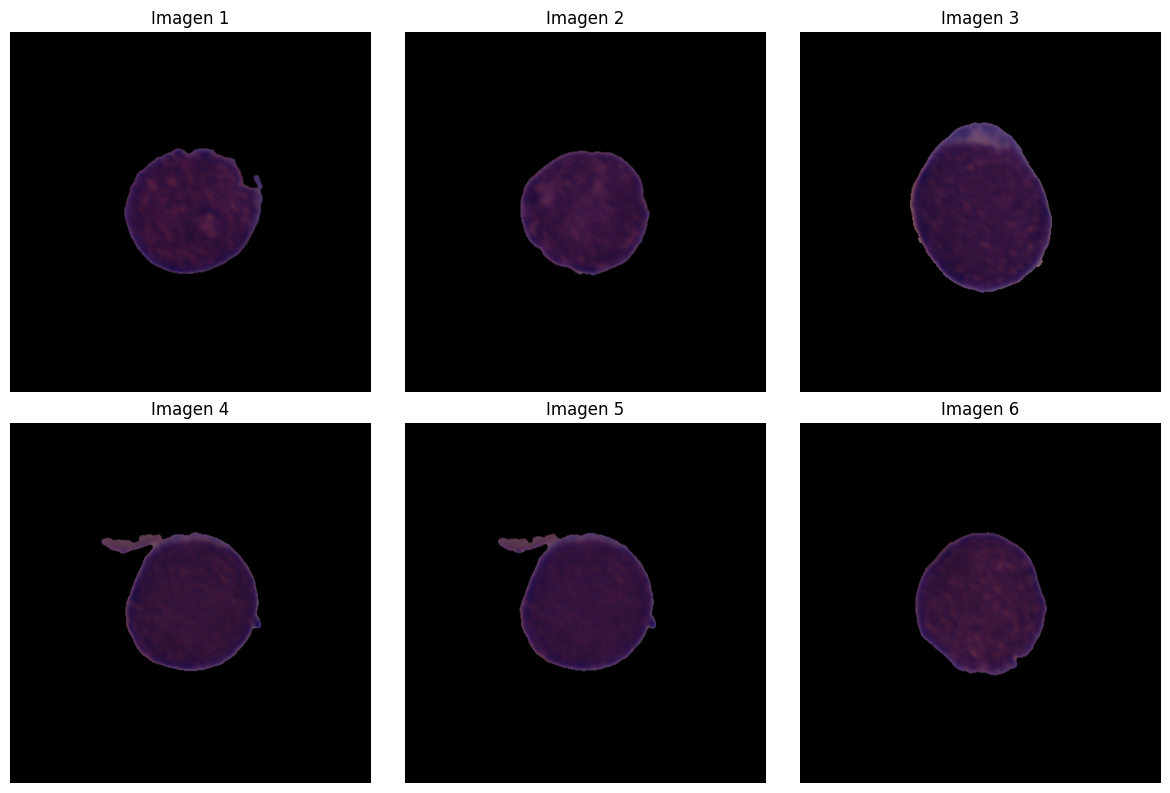

In [ ]:

# Mostrar las primeras 6 imágenes
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(min(6, len(training_data_fold_2_hem ))):
    ax = axes[i // 3, i % 3]
    # Convertir de BGR (OpenCV) a RGB para mostrar correctamente
    img_rgb = cv2.cvtColor(training_data_fold_2_hem [i], cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(f"Imagen {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Carga de imagenes de validation_data / C-NMC_test_prelim_phase_data

In [ ]:
#Path
validation_data_path = "data/validation_data/C-NMC_test_prelim_phase_data/"

#Lista imagenes
validation_data = []

for i in range(1, 1867):
    nombre_archivo = os.path.join(validation_data_path, f"{i}.bmp")
    if not os.path.exists(nombre_archivo):
        print(f"Advertencia: no existe {nombre_archivo}")
        continue
    img = cv2.imread(nombre_archivo)
    if img is not None:
        validation_data.append(img)
    else:
        print(f"Advertencia: no se pudo cargar la imagen {nombre_archivo}")

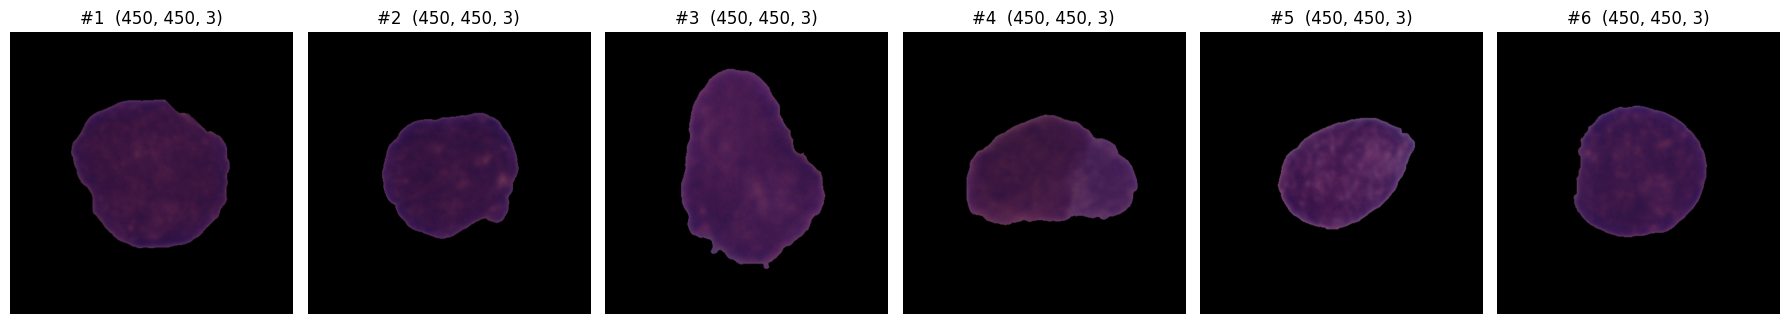

In [ ]:
# Mostrar las primeras N imágenes cargadas en testing_data
N = 6
if isinstance(validation_data, list) and len(validation_data) > 0:
    n = min(N, len(validation_data))
    plt.figure(figsize=(3*n, 4))
    for i in range(n):
        img = validation_data[i]
        if img is None:
            continue
        # Si es BGR (cv2) convertir a RGB para matplotlib
        if len(img.shape) == 3 and img.shape[2] == 3:
            disp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            cmap = None
        else:
            disp = img
            cmap = 'gray'
        ax = plt.subplot(1, n, i+1)
        plt.imshow(disp, cmap=cmap)
        plt.title(f"#{i+1}  {disp.shape}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("testing_data no es una lista o está vacía. Asegúrate de haber ejecutado la celda que carga las imágenes.")


# Procesamiento de las imagenes para bajara dimension con PCA

In [ ]:
print("Shape de todas las imagenes\n")

print("Testing data shape:\n")
print(testing_data[1000].shape)

print("\ntraining data fold 0 all shape\n")
print(training_data_fold_0_all[1000].shape)

print("\ntraining data fold 0 hem shape\n")
print(training_data_fold_0_hem[1000].shape)

print("\ntraining data fold 1 all shape\n")
print(training_data_fold_1_all[1000].shape)

print("\ntraining data fold 1 hem shape\n")
print(training_data_fold_1_hem[500].shape)

print("\ntraining data fold 2 all shape\n")
print(training_data_fold_2_all[1000].shape)

print("\ntraining data fold 2 hem shape\n")
print(training_data_fold_2_hem[500].shape)

print("\nvalidation data shape:\n")
print(validation_data[1000].shape)


Shape de todas las imagenes

Testing data shape:

(600, 600, 3)

training data fold 0 all shape

(450, 450, 3)

training data fold 0 hem shape

(450, 450, 3)

training data fold 1 all shape

(450, 450, 3)

training data fold 1 hem shape

(450, 450, 3)

training data fold 2 all shape

(450, 450, 3)

training data fold 2 hem shape

(450, 450, 3)

validation data shape:

(450, 450, 3)


Testing_data_reconstruida

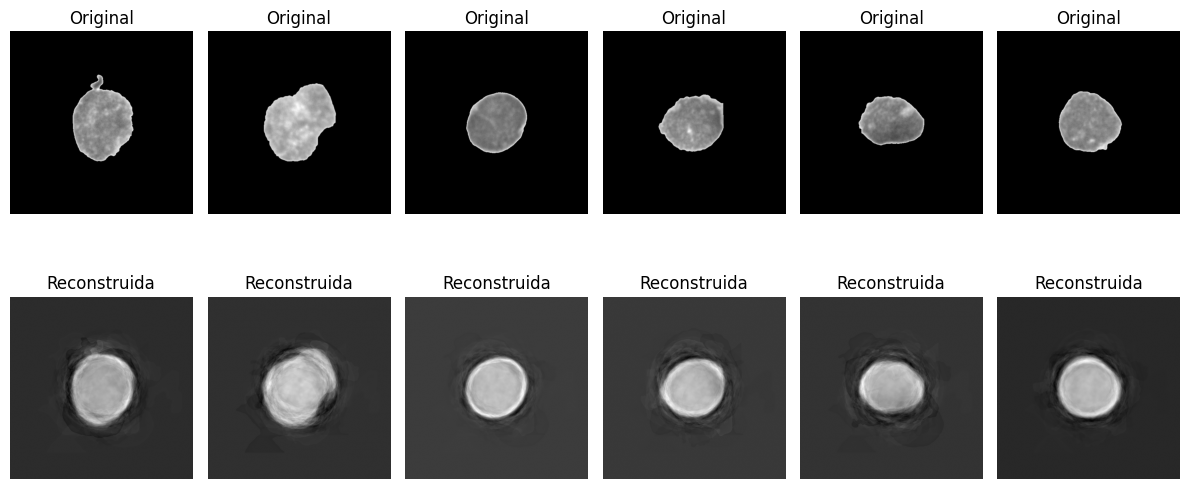

In [ ]:
# ...existing code...

# Selecciona solo una muestra de 100 imágenes
sample_size = 500
testing_sample = testing_data[:sample_size]

# 1. Convertir la lista de imágenes a un arreglo numpy (asumiendo imágenes de igual tamaño)
testing_data_np = np.array(testing_sample)
n_imgs, h, w, c = testing_data_np.shape

# 2. Convertir a escala de grises si es necesario
if c == 3:
    testing_data_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in testing_data_np])
else:
    testing_data_gray = testing_data_np.squeeze()

# 3. Aplanar cada imagen
X = testing_data_gray.reshape(n_imgs, -1)

# 4. Centrar los datos
X_bar = X.mean(axis=0)
X_centered = X - X_bar

# 5. PCA usando SVD (más eficiente que covarianza)
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# 6. Seleccionar q componentes principales
q = 50  # Puedes ajustar este número
E = Vt[:q].T  # Componentes principales como columnas

# 7. Proyectar y reconstruir
Y = X_centered @ E
X_hat = (Y @ E.T) + X_bar

# 8. Volver a la forma original de imagen
testing_data_reconstruida = X_hat.reshape(n_imgs, h, w)

# Visualización
plt.figure(figsize=(12, 6))
for i in range(min(6, n_imgs)):
    plt.subplot(2, 6, i+1)
    plt.imshow(testing_data_gray[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 6, i+7)
    plt.imshow(testing_data_reconstruida[i], cmap='gray')
    plt.title("Reconstruida")
    plt.axis('off')
plt.tight_layout()
plt.show()
# ...existing code...

Guardar Imagenes Reconstruidas

In [ ]:
# Crear directorio para guardar las imágenes reconstruidas
import os

# Define el path donde quieres guardar
output_path = "data_reconstruida/testing_data/"

# Crea el directorio si no existe
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Verificar que tengamos las 500 imágenes
n_images = len(testing_data_reconstruida)
print(f"Número de imágenes a guardar: {n_images}")
if n_images != 500:
    print("Advertencia: El número de imágenes no es 500")

# Asegurarse que las imágenes estén en rango 0-255 y sean uint8
testing_data_reconstructed_uint8 = np.clip(testing_data_reconstruida, 0, 255).astype(np.uint8)

# Contador de imágenes guardadas exitosamente
saved_count = 0

# Guardar cada imagen
for i in range(n_images):
    # Crear nombre de archivo
    filename = f"testing_{i+1}.bmp"
    filepath = os.path.join(output_path, filename)

    # Guardar imagen
    success = cv2.imwrite(filepath, testing_data_reconstructed_uint8[i])

    if success:
        saved_count += 1
        if i % 50 == 0:  # Mostrar progreso cada 50 imágenes
            print(f"Guardada imagen {i+1}/{n_images}")
    else:
        print(f"Error al guardar imagen {i+1}")

print(f"\nProceso completado!")
print(f"Total de imágenes guardadas exitosamente: {saved_count}/{n_images}")
print(f"Las imágenes fueron guardadas en: {os.path.abspath(output_path)}")

# Verificación final
saved_files = os.listdir(output_path)
print(f"Número de archivos en el directorio: {len(saved_files)}")

Número de imágenes a guardar: 500
Guardada imagen 1/500
Guardada imagen 51/500
Guardada imagen 101/500
Guardada imagen 151/500
Guardada imagen 201/500
Guardada imagen 251/500
Guardada imagen 301/500
Guardada imagen 351/500
Guardada imagen 401/500
Guardada imagen 451/500

Proceso completado!
Total de imágenes guardadas exitosamente: 500/500
Las imágenes fueron guardadas en: c:\Users\Piskyz\Documents\Programas\Personal\(best) Deteccion de Leukemia\Leucemia-Clasificacion-optimizada-\data_reconstruida\testing_data
Número de archivos en el directorio: 500


Reconstruccion de fold 0 all

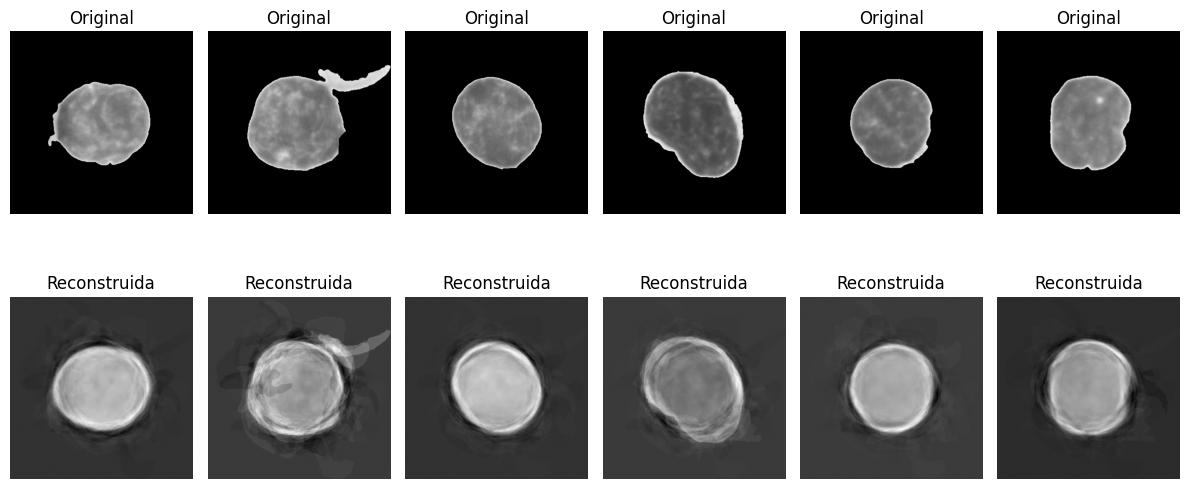

In [ ]:
# Reconstrucción de fold_0_all
# Selecciona solo 500 imágenes
sample_size = 500
fold_0_all_sample = training_data_fold_0_all[:sample_size]

# 1. Convertir la lista de imágenes a un arreglo numpy
fold_0_all_np = np.array(fold_0_all_sample)
n_imgs, h, w, c = fold_0_all_np.shape

# 2. Convertir a escala de grises
if c == 3:
    fold_0_all_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in fold_0_all_np])
else:
    fold_0_all_gray = fold_0_all_np.squeeze()

# 3. Aplanar cada imagen
X = fold_0_all_gray.reshape(n_imgs, -1)

# 4. Centrar los datos
X_bar = X.mean(axis=0)
X_centered = X - X_bar

# 5. PCA usando SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# 6. Seleccionar componentes principales
q = 50  # Mismo número que usamos antes
E = Vt[:q].T

# 7. Proyectar y reconstruir
Y = X_centered @ E
X_hat = (Y @ E.T) + X_bar

# 8. Volver a la forma original
fold_0_all_reconstruida = X_hat.reshape(n_imgs, h, w)

# Visualización
plt.figure(figsize=(12, 6))
for i in range(min(6, n_imgs)):
    plt.subplot(2, 6, i+1)
    plt.imshow(fold_0_all_gray[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 6, i+7)
    plt.imshow(fold_0_all_reconstruida[i], cmap='gray')
    plt.title("Reconstruida")
    plt.axis('off')
plt.tight_layout()
plt.show()



Guardar Imagenes

In [ ]:

# Guardar las imágenes reconstruidas
output_path = "data_reconstruida/training_data/fold_0/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Convertir a uint8 para guardar
fold_0_all_reconstructed_uint8 = np.clip(fold_0_all_reconstruida, 0, 255).astype(np.uint8)

# Guardar cada imagen
saved_count = 0
for i in range(len(fold_0_all_reconstructed_uint8)):
    filename = f"testing_fold_0_{i+1}.bmp"
    filepath = os.path.join(output_path, filename)
    success = cv2.imwrite(filepath, fold_0_all_reconstructed_uint8[i])
    if success:
        saved_count += 1
        if i % 50 == 0:
            print(f"Guardada imagen {i+1}/{len(fold_0_all_reconstructed_uint8)}")
    else:
        print(f"Error al guardar imagen {i+1}")

print(f"\nProceso completado!")
print(f"Total de imágenes guardadas: {saved_count}")
print(f"Ruta: {os.path.abspath(output_path)}")

Guardada imagen 1/500
Guardada imagen 51/500
Guardada imagen 101/500
Guardada imagen 151/500
Guardada imagen 201/500
Guardada imagen 251/500
Guardada imagen 301/500
Guardada imagen 351/500
Guardada imagen 401/500
Guardada imagen 451/500

Proceso completado!
Total de imágenes guardadas: 500
Ruta: c:\Users\Piskyz\Documents\Programas\Personal\(best) Deteccion de Leukemia\Leucemia-Clasificacion-optimizada-\data_reconstruida\training_data\fold_0


#reconstruccione de training fold 0 hem

In [ ]:

# Reconstrucción de fold_0_hem
# Selecciona solo 500 imágenes
sample_size = 500
fold_0_hem_sample = training_data_fold_0_hem[:sample_size]

# 1. Convertir la lista de imágenes a un arreglo numpy
fold_0_hem_np = np.array(fold_0_hem_sample)
n_imgs, h, w, c = fold_0_hem_np.shape

# 2. Convertir a escala de grises
if c == 3:
    fold_0_hem_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in fold_0_hem_np])
else:
    fold_0_hem_gray = fold_0_hem_np.squeeze()

# 3. Aplanar cada imagen
X = fold_0_hem_gray.reshape(n_imgs, -1)

# 4. Centrar los datos
X_bar = X.mean(axis=0)
X_centered = X - X_bar

# 5. PCA usando SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# 6. Seleccionar componentes principales
q = 50  # Mismo número que usamos antes
E = Vt[:q].T

# 7. Proyectar y reconstruir
Y = X_centered @ E
X_hat = (Y @ E.T) + X_bar

# 8. Volver a la forma original
fold_0_hem_reconstruida = X_hat.reshape(n_imgs, h, w)

# Visualización
plt.figure(figsize=(12, 6))
for i in range(min(6, n_imgs)):
    plt.subplot(2, 6, i+1)
    plt.imshow(fold_0_hem_gray[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 6, i+7)
    plt.imshow(fold_0_hem_reconstruida[i], cmap='gray')
    plt.title("Reconstruida")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Guardar las imágenes reconstruidas
output_path = "data_reconstruida/training_data/fold_0/hem/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Convertir a uint8 para guardar
fold_0_hem_reconstructed_uint8 = np.clip(fold_0_hem_reconstruida, 0, 255).astype(np.uint8)

# Guardar cada imagen
saved_count = 0
for i in range(len(fold_0_hem_reconstructed_uint8)):
    filename = f"testing_fold_0_{i+1}.bmp"
    filepath = os.path.join(output_path, filename)
    success = cv2.imwrite(filepath, fold_0_hem_reconstructed_uint8[i])
    if success:
        saved_count += 1
        if i % 50 == 0:
            print(f"Guardada imagen {i+1}/{len(fold_0_hem_reconstructed_uint8)}")
    else:
        print(f"Error al guardar imagen {i+1}")

print(f"\nProceso completado!")
print(f"Total de imágenes guardadas: {saved_count}")
print(f"Ruta: {os.path.abspath(output_path)}")

Reconstruccion de training fold 1 all



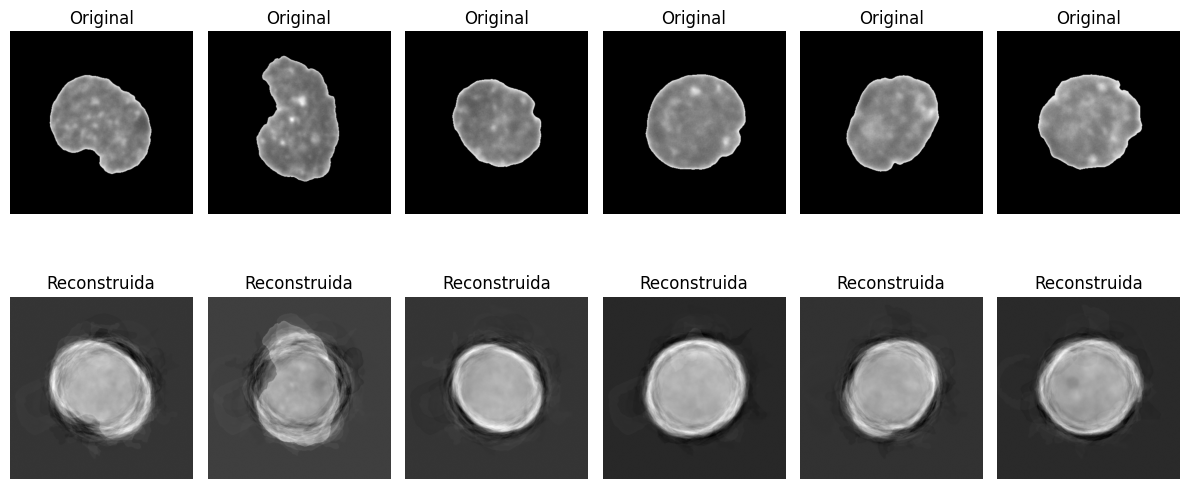

In [ ]:
# Reconstrucción de fold_1_all
# Selecciona solo 500 imágenes
sample_size = 500
fold_1_all_sample = training_data_fold_1_all[:sample_size]

# 1. Convertir la lista de imágenes a un arreglo numpy
fold_1_all_np = np.array(fold_1_all_sample)
n_imgs, h, w, c = fold_1_all_np.shape

# 2. Convertir a escala de grises
if c == 3:
    fold_1_all_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in fold_1_all_np])
else:
    fold_1_all_gray = fold_1_all_np.squeeze()

# 3. Aplanar cada imagen
X = fold_1_all_gray.reshape(n_imgs, -1)

# 4. Centrar los datos
X_bar = X.mean(axis=0)
X_centered = X - X_bar

# 5. PCA usando SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# 6. Seleccionar componentes principales
q = 50  # Mismo número que usamos antes
E = Vt[:q].T

# 7. Proyectar y reconstruir
Y = X_centered @ E
X_hat = (Y @ E.T) + X_bar

# 8. Volver a la forma original
fold_1_all_reconstruida = X_hat.reshape(n_imgs, h, w)

# Visualización
plt.figure(figsize=(12, 6))
for i in range(min(6, n_imgs)):
    plt.subplot(2, 6, i+1)
    plt.imshow(fold_1_all_gray[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 6, i+7)
    plt.imshow(fold_1_all_reconstruida[i], cmap='gray')
    plt.title("Reconstruida")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Guardar las imágenes reconstruidas de fold_1_all
output_path = "data_reconstruida/training_data/fold_1/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Convertir a uint8 para guardar
fold_1_all_reconstructed_uint8 = np.clip(fold_1_all_reconstruida, 0, 255).astype(np.uint8)

# Guardar cada imagen
saved_count = 0
for i in range(len(fold_1_all_reconstructed_uint8)):
    filename = f"testing_fold_1_{i+1}.bmp"
    filepath = os.path.join(output_path, filename)
    success = cv2.imwrite(filepath, fold_1_all_reconstructed_uint8[i])
    if success:
        saved_count += 1
        if i % 50 == 0:
            print(f"Guardada imagen {i+1}/{len(fold_1_all_reconstructed_uint8)}")
    else:
        print(f"Error al guardar imagen {i+1}")

print(f"\nProceso completado!")
print(f"Total de imágenes guardadas: {saved_count}")
print(f"Ruta: {os.path.abspath(output_path)}")

Guardada imagen 1/500
Guardada imagen 51/500
Guardada imagen 101/500
Guardada imagen 151/500
Guardada imagen 201/500
Guardada imagen 251/500
Guardada imagen 301/500
Guardada imagen 351/500
Guardada imagen 401/500
Guardada imagen 451/500

Proceso completado!
Total de imágenes guardadas: 500
Ruta: c:\Users\Piskyz\Documents\Programas\Personal\(best) Deteccion de Leukemia\Leucemia-Clasificacion-optimizada-\data_reconstruida\training_data\fold_1


reconstruccion de training fold 1 hem

In [ ]:
# Reconstrucción de fold_1_hem
# Selecciona solo 500 imágenes
sample_size = 500
fold_1_hem_sample = training_data_fold_1_hem[:sample_size]

# 1. Convertir la lista de imágenes a un arreglo numpy
fold_1_hem_np = np.array(fold_1_hem_sample)
n_imgs, h, w, c = fold_1_hem_np.shape

# 2. Convertir a escala de grises
if c == 3:
    fold_1_hem_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in fold_1_hem_np])
else:
    fold_1_hem_gray = fold_1_hem_np.squeeze()

# 3. Aplanar cada imagen
X = fold_1_hem_gray.reshape(n_imgs, -1)

# 4. Centrar los datos
X_bar = X.mean(axis=0)
X_centered = X - X_bar

# 5. PCA usando SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# 6. Seleccionar componentes principales
q = 50  # Mismo número que usamos antes
E = Vt[:q].T

# 7. Proyectar y reconstruir
Y = X_centered @ E
X_hat = (Y @ E.T) + X_bar

# 8. Volver a la forma original
fold_1_hem_reconstruida = X_hat.reshape(n_imgs, h, w)

# Visualización
plt.figure(figsize=(12, 6))
for i in range(min(6, n_imgs)):
    plt.subplot(2, 6, i+1)
    plt.imshow(fold_1_hem_gray[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 6, i+7)
    plt.imshow(fold_1_hem_reconstruida[i], cmap='gray')
    plt.title("Reconstruida")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#Guardar las imágenes reconstruidas
output_path = "data_reconstruida/training_data/fold_1/hem/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Convertir a uint8 para guardar
fold_1_hem_reconstructed_uint8 = np.clip(fold_1_hem_reconstruida, 0, 255).astype(np.uint8)

# Guardar cada imagen
saved_count = 0
for i in range(len(fold_1_hem_reconstructed_uint8)):
    filename = f"testing_fold_1_{i+1}.bmp"
    filepath = os.path.join(output_path, filename)
    success = cv2.imwrite(filepath, fold_1_hem_reconstructed_uint8[i])
    if success:
        saved_count += 1
        if i % 50 == 0:
            print(f"Guardada imagen {i+1}/{len(fold_1_hem_reconstructed_uint8)}")
    else:
        print(f"Error al guardar imagen {i+1}")

print(f"\nProceso completado!")
print(f"Total de imágenes guardadas: {saved_count}")
print(f"Ruta: {os.path.abspath(output_path)}")


reconstruccion de Training fold 2

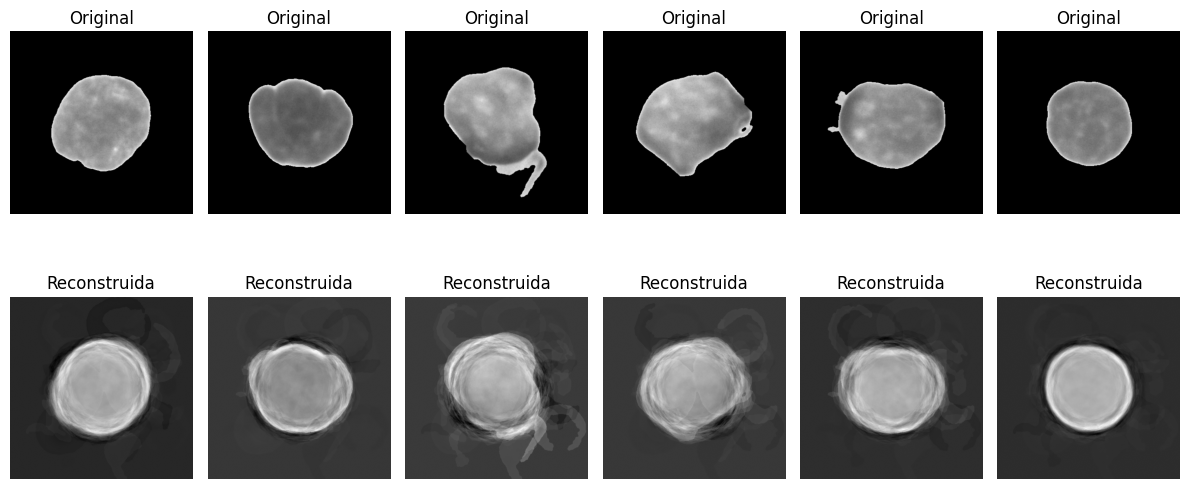

In [ ]:
# Reconstrucción de fold_2_all
# Selecciona solo 500 imágenes
sample_size = 500
fold_2_all_sample = training_data_fold_2_all[:sample_size]

# 1. Convertir la lista de imágenes a un arreglo numpy
fold_2_all_np = np.array(fold_2_all_sample)
n_imgs, h, w, c = fold_2_all_np.shape

# 2. Convertir a escala de grises
if c == 3:
    fold_2_all_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in fold_2_all_np])
else:
    fold_2_all_gray = fold_2_all_np.squeeze()

# 3. Aplanar cada imagen
X = fold_2_all_gray.reshape(n_imgs, -1)

# 4. Centrar los datos
X_bar = X.mean(axis=0)
X_centered = X - X_bar

# 5. PCA usando SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# 6. Seleccionar componentes principales
q = 50  # Mismo número que usamos antes
E = Vt[:q].T

# 7. Proyectar y reconstruir
Y = X_centered @ E
X_hat = (Y @ E.T) + X_bar

# 8. Volver a la forma original
fold_2_all_reconstruida = X_hat.reshape(n_imgs, h, w)

# Visualización
plt.figure(figsize=(12, 6))
for i in range(min(6, n_imgs)):
    plt.subplot(2, 6, i+1)
    plt.imshow(fold_2_all_gray[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 6, i+7)
    plt.imshow(fold_2_all_reconstruida[i], cmap='gray')
    plt.title("Reconstruida")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:

# Guardar las imágenes reconstruidas de fold_2_all
output_path = "data_reconstruida/training_data/fold_2/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Convertir a uint8 para guardar
fold_2_all_reconstructed_uint8 = np.clip(fold_2_all_reconstruida, 0, 255).astype(np.uint8)

# Guardar cada imagen
saved_count = 0
for i in range(len(fold_2_all_reconstructed_uint8)):
    filename = f"testing_fold_2_{i+1}.bmp"
    filepath = os.path.join(output_path, filename)
    success = cv2.imwrite(filepath, fold_2_all_reconstructed_uint8[i])
    if success:
        saved_count += 1
        if i % 50 == 0:
            print(f"Guardada imagen {i+1}/{len(fold_2_all_reconstructed_uint8)}")
    else:
        print(f"Error al guardar imagen {i+1}")

print(f"\nProceso completado!")
print(f"Total de imágenes guardadas: {saved_count}")
print(f"Ruta: {os.path.abspath(output_path)}")

Guardada imagen 1/500
Guardada imagen 51/500
Guardada imagen 101/500
Guardada imagen 151/500
Guardada imagen 201/500
Guardada imagen 251/500
Guardada imagen 301/500
Guardada imagen 351/500
Guardada imagen 401/500
Guardada imagen 451/500

Proceso completado!
Total de imágenes guardadas: 500
Ruta: c:\Users\Piskyz\Documents\Programas\Personal\(best) Deteccion de Leukemia\Leucemia-Clasificacion-optimizada-\data_reconstruida\training_data\fold_2


# Reconstruccion training data fold 2 hem

In [ ]:
# Reconstrucción de fold_2_hem
# Selecciona solo 500 imágenes
sample_size = 500
fold_2_hem_sample = training_data_fold_2_hem[:sample_size]

# 1. Convertir la lista de imágenes a un arreglo numpy
fold_2_hem_np = np.array(fold_2_hem_sample)
n_imgs, h, w, c = fold_2_hem_np.shape

# 2. Convertir a escala de grises
if c == 3:
    fold_2_hem_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in fold_2_hem_np])
else:
    fold_2_hem_gray = fold_2_hem_np.squeeze()

# 3. Aplanar cada imagen
X = fold_2_hem_gray.reshape(n_imgs, -1)

# 4. Centrar los datos
X_bar = X.mean(axis=0)
X_centered = X - X_bar

# 5. PCA usando SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# 6. Seleccionar componentes principales
q = 50  # Mismo número que usamos antes
E = Vt[:q].T

# 7. Proyectar y reconstruir
Y = X_centered @ E
X_hat = (Y @ E.T) + X_bar

# 8. Volver a la forma original
fold_2_hem_reconstruida = X_hat.reshape(n_imgs, h, w)

# Visualización
plt.figure(figsize=(12, 6))
for i in range(min(6, n_imgs)):
    plt.subplot(2, 6, i+1)
    plt.imshow(fold_2_hem_gray[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 6, i+7)
    plt.imshow(fold_2_hem_reconstruida[i], cmap='gray')
    plt.title("Reconstruida")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Guardar las imágenes reconstruidas
output_path = "data_reconstruida/training_data/fold_2/hem/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Convertir a uint8 para guardar
fold_2_hem_reconstructed_uint8 = np.clip(fold_2_hem_reconstruida, 0, 255).astype(np.uint8)

# Guardar cada imagen
saved_count = 0
for i in range(len(fold_2_hem_reconstructed_uint8)):
    filename = f"testing_fold_2_{i+1}.bmp"
    filepath = os.path.join(output_path, filename)
    success = cv2.imwrite(filepath, fold_2_hem_reconstructed_uint8[i])
    if success:
        saved_count += 1
        if i % 50 == 0:
            print(f"Guardada imagen {i+1}/{len(fold_2_hem_reconstructed_uint8)}")
    else:
        print(f"Error al guardar imagen {i+1}")

print(f"\nProceso completado!")
print(f"Total de imágenes guardadas: {saved_count}")
print(f"Ruta: {os.path.abspath(output_path)}")


Reconstruccion de validation data

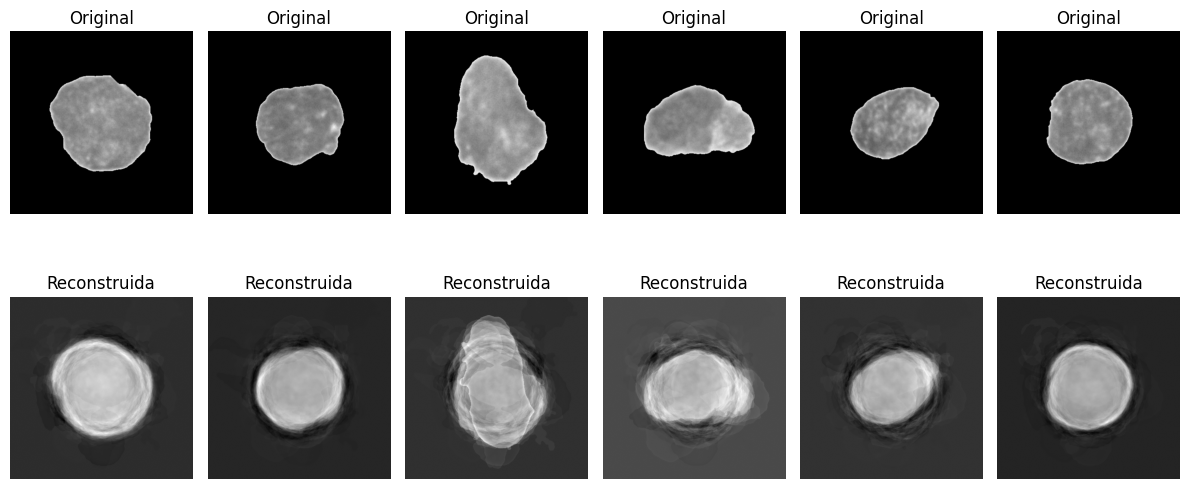

In [ ]:
# Reconstrucción de validation_data con 50 muestras y 50 componentes principales

# Selecciona solo 50 imágenes
sample_size = 500
validation_sample = validation_data[:sample_size]

# 1. Convertir la lista de imágenes a un arreglo numpy
validation_np = np.array(validation_sample)
n_imgs, h, w, c = validation_np.shape

# 2. Convertir a escala de grises
if c == 3:
    validation_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in validation_np])
else:
    validation_gray = validation_np.squeeze()

# 3. Aplanar cada imagen
X = validation_gray.reshape(n_imgs, -1)

# 4. Centrar los datos
X_bar = X.mean(axis=0)
X_centered = X - X_bar

# 5. PCA usando SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# 6. Seleccionar 50 componentes principales
q = 50
E = Vt[:q].T

# 7. Proyectar y reconstruir
Y = X_centered @ E
X_hat = (Y @ E.T) + X_bar

# 8. Volver a la forma original
validation_data_reconstruida = X_hat.reshape(n_imgs, h, w)

# Visualización
plt.figure(figsize=(12, 6))
for i in range(min(6, n_imgs)):
    plt.subplot(2, 6, i+1)
    plt.imshow(validation_gray[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 6, i+7)
    plt.imshow(validation_data_reconstruida[i], cmap='gray')
    plt.title("Reconstruida")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Guardar validation_data_reconstruida en disco (espacio de validation data)
output_path = "data_reconstruida/validation_data/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

try:
    n_images = len(validation_data_reconstruida)
except NameError:
    print("Error: 'validation_data_reconstruida' no está definida. Ejecuta la celda de reconstrucción primero.")
else:
    print(f"Número de imágenes a guardar: {n_images}")
    if n_images != 500:
        print("Advertencia: el número de imágenes no es 500 (usar el valor real disponible).")

    # Asegurar rango 0-255 y tipo uint8
    validation_uint8 = np.clip(validation_data_reconstruida, 0, 255).astype(np.uint8)

    saved_count = 0
    for i in range(n_images):
        filename = f"validation_{i+1}.bmp"
        filepath = os.path.join(output_path, filename)
        success = cv2.imwrite(filepath, validation_uint8[i])
        if success:
            saved_count += 1
            if (i + 1) % 50 == 0 or (i + 1) == n_images:
                print(f"Guardadas {i+1}/{n_images}")
        else:
            print(f"Error al guardar imagen {i+1}: {filepath}")

    print(f"\nProceso completado: {saved_count}/{n_images} imágenes guardadas.")
    print(f"Ruta absoluta: {os.path.abspath(output_path)}")
    try:
        print(f"Archivos en directorio: {len(os.listdir(output_path))}")
    except Exception:
        pass

Número de imágenes a guardar: 500
Guardadas 50/500
Guardadas 100/500
Guardadas 150/500
Guardadas 200/500
Guardadas 250/500
Guardadas 300/500
Guardadas 350/500
Guardadas 400/500
Guardadas 450/500
Guardadas 500/500

Proceso completado: 500/500 imágenes guardadas.
Ruta absoluta: c:\Users\Piskyz\Documents\Programas\Personal\(best) Deteccion de Leukemia\Leucemia-Clasificacion-optimizada-\data_reconstruida\validation_data
Archivos en directorio: 500
